In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Fibre, Blocking coating

In [69]:
DATADIR = '../ratios/fibre-block/'
#DIRS = [DATADIR+i for i in ["_25", "_20", "_15", "_10", "_5", "0", "5", "10", "15", "20", "25"]]
DIRS = [DATADIR+i for i in ["_20", "_15", "_10", "_5", "0", "5", "10", "15", "20"]]


In [70]:
def countsReturner(file_path):
    df = pd.read_csv(file_path, header=None, comment="#", on_bad_lines="skip")

    df.columns = [
        "event_id", "track_id", "particle", "parent_id",
        "time", "volume", "copy_no", "energy",
        "prev_volume", "step_no", "process"
    ]
    counts = []
    scintillationdf = df.loc[df['process'] == 'Scintillation']

    for i in scintillationdf['event_id'].unique():
        newdf = scintillationdf.loc[df['event_id'] == i]
        sipm_counts = newdf.groupby("copy_no").size().reset_index(name="photon_count")
        try:
            sipm0_counts = sipm_counts.to_numpy()[0][1]
            sipm1_counts = sipm_counts.to_numpy()[1][1]
            counts.append([i, sipm0_counts, sipm1_counts])
        except:
            pass
        
    return(counts)

In [71]:
beegCounts = [[] for i in DIRS]
for dir in range(len(DIRS)):
    print(DIRS[dir])
    for file in os.listdir(DIRS[dir]):
        file_path = DIRS[dir] + "/"+file
        counts = countsReturner(file_path)
        beegCounts[dir] += counts

../ratios/fibre-block/_20
../ratios/fibre-block/_15
../ratios/fibre-block/_10
../ratios/fibre-block/_5
../ratios/fibre-block/0
../ratios/fibre-block/5
../ratios/fibre-block/10
../ratios/fibre-block/15
../ratios/fibre-block/20


In [33]:
beegRatios = [[] for i in DIRS]

In [34]:
for i in range(len(beegCounts)):
    for event in beegCounts[i]:
        ratio0 = event[1]/(event[1]+event[2])
        ratio1 = event[2]/(event[1]+event[2])
        beegRatios[i].append([ratio0, ratio1])

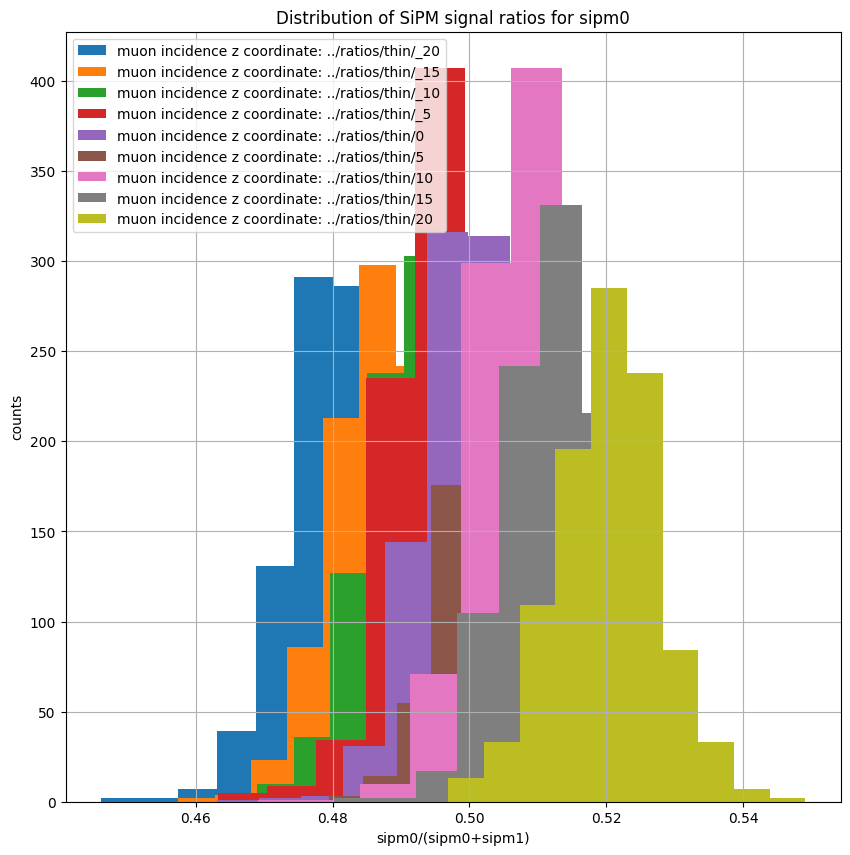

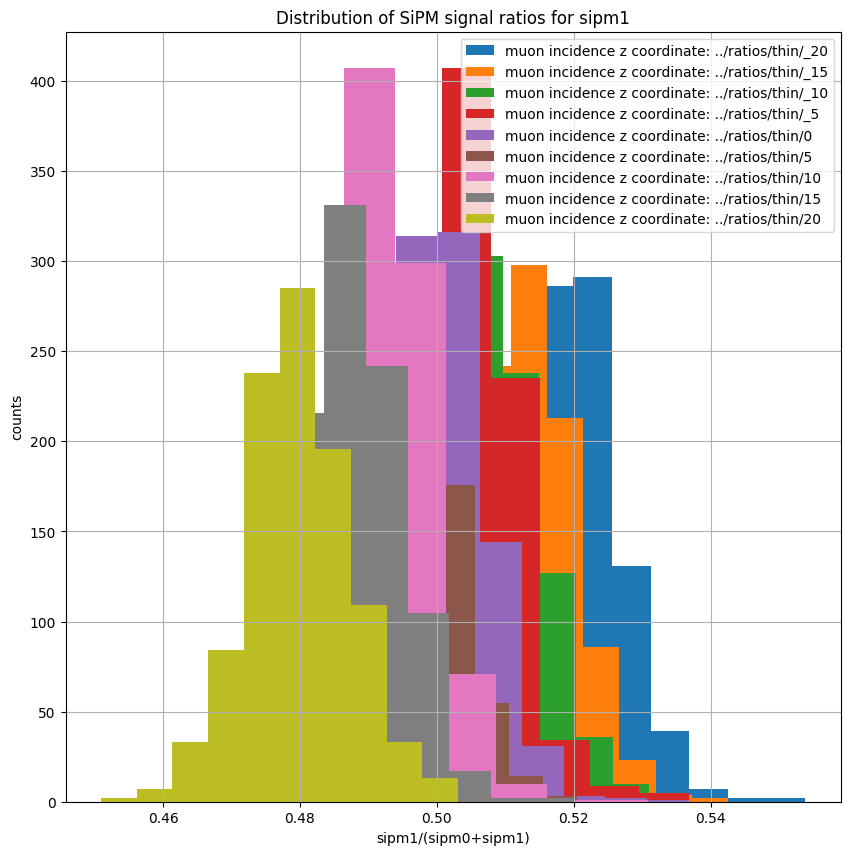

In [35]:
x_axis = DIRS
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[0] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm0/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm0")
ax.legend()
ax.grid()


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[1] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm1/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm1")
ax.legend()
ax.grid()

In [36]:
sipm0means = [np.mean(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1means = [np.mean(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0var  = [np.var(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1var  = [np.var(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0std  = [np.std(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1std  = [np.std(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]

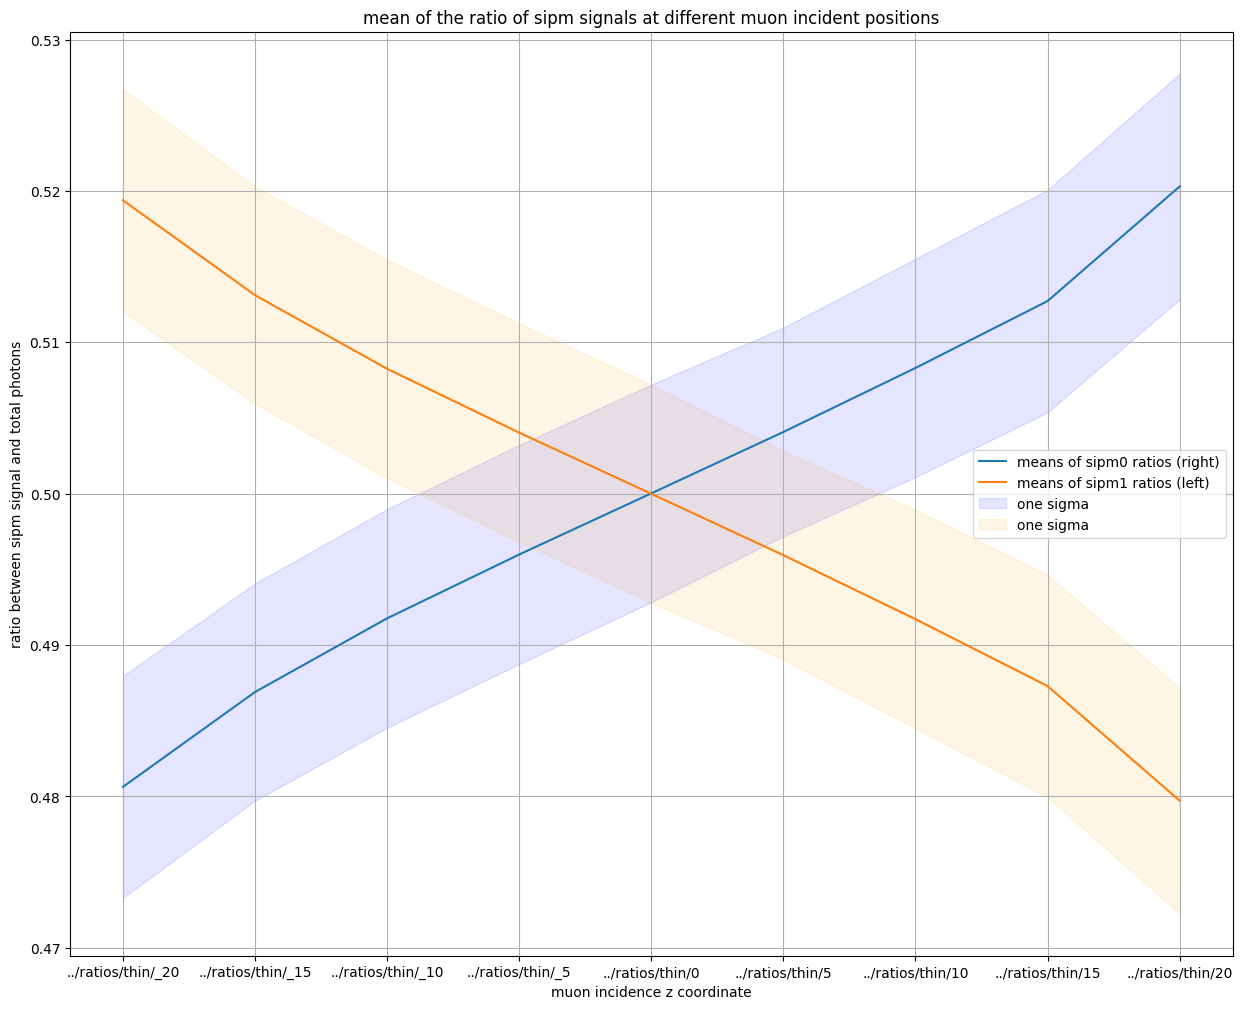

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x_axis = DIRS
ax.plot(x_axis, sipm0means, label='means of sipm0 ratios (right)')
ax.plot(x_axis, sipm1means, label='means of sipm1 ratios (left)')
ax.fill_between(x_axis, np.array(sipm0means) - np.array(sipm0std), np.array(sipm0means) + np.array(sipm0std), color='blue', alpha=0.1, label='one sigma')
ax.fill_between(x_axis, np.array(sipm1means) - np.array(sipm1std), np.array(sipm1means) + np.array(sipm1std), color='orange', alpha=0.1, label='one sigma')
ax.grid()
ax.set_xlabel('muon incidence z coordinate')
ax.set_ylabel('ratio between sipm signal and total photons')
ax.set_title("mean of the ratio of sipm signals at different muon incident positions")
ax.legend()


# Fibre, Reflective Coating

In [60]:
DATADIR = '../ratios/fibre-reflective/'
#DIRS = [DATADIR+i for i in ["_25", "_20", "_15", "_10", "_5", "0", "5", "10", "15", "20", "25"]]
DIRS = [DATADIR+i for i in ["_20", "_15", "_10", "_5", "0", "5", "10", "15", "20"]]

In [61]:
beegCounts = [[] for i in DIRS]
for dir in range(len(DIRS)):
    print(DIRS[dir])
    for file in os.listdir(DIRS[dir]):
        file_path = DIRS[dir] + "/"+file
        counts = countsReturner(file_path)
        beegCounts[dir] += counts

../ratios/fibre-reflective/_20
../ratios/fibre-reflective/_15
../ratios/fibre-reflective/_10
../ratios/fibre-reflective/_5
../ratios/fibre-reflective/0
../ratios/fibre-reflective/5
../ratios/fibre-reflective/10
../ratios/fibre-reflective/15
../ratios/fibre-reflective/20


In [62]:
beegRatios = [[] for i in DIRS]
for i in range(len(beegCounts)):
    for event in beegCounts[i]:
        ratio0 = event[1]/(event[1]+event[2])
        ratio1 = event[2]/(event[1]+event[2])
        beegRatios[i].append([ratio0, ratio1])

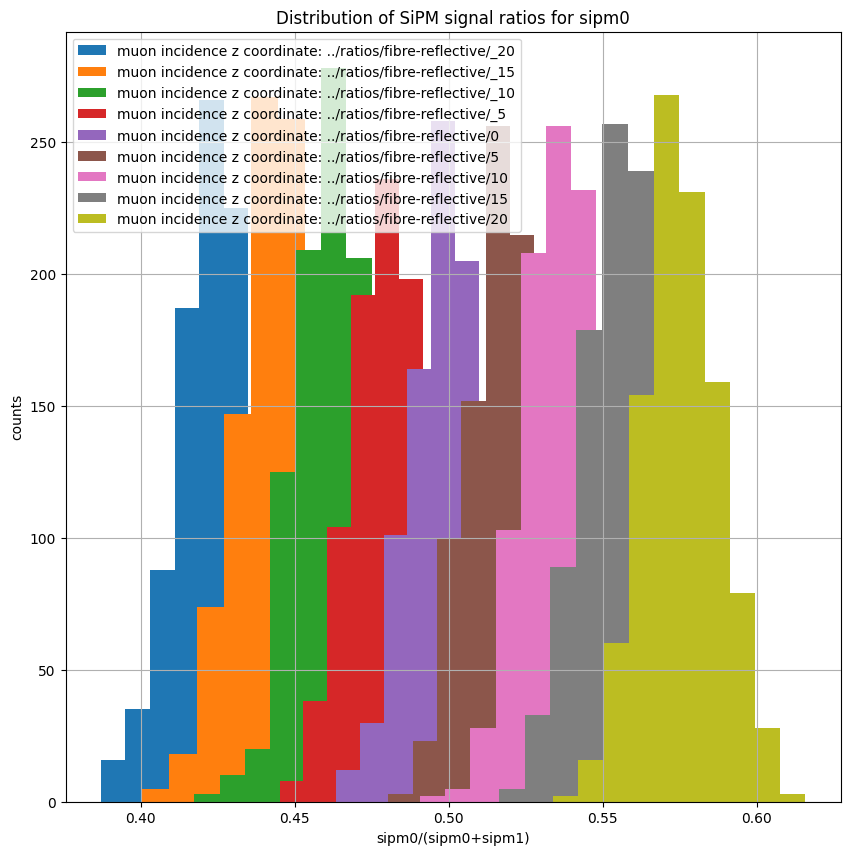

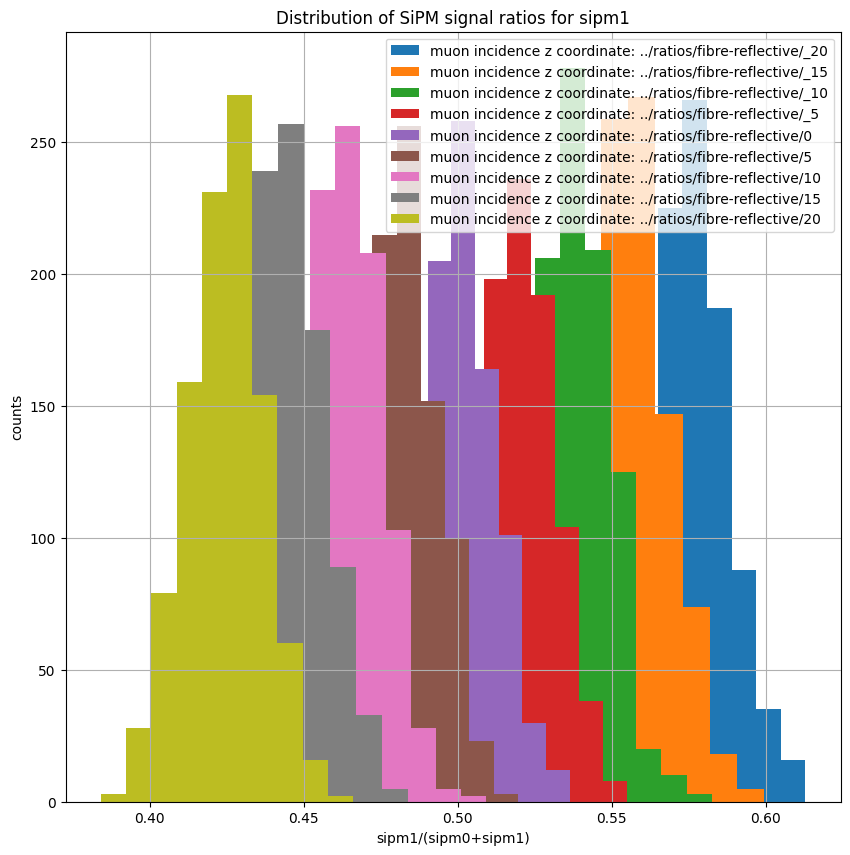

In [63]:
x_axis = DIRS
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[0] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm0/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm0")
ax.legend()
ax.grid()


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[1] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm1/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm1")
ax.legend()
ax.grid()

In [64]:
sipm0means = [np.mean(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1means = [np.mean(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0var  = [np.var(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1var  = [np.var(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0std  = [np.std(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1std  = [np.std(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]

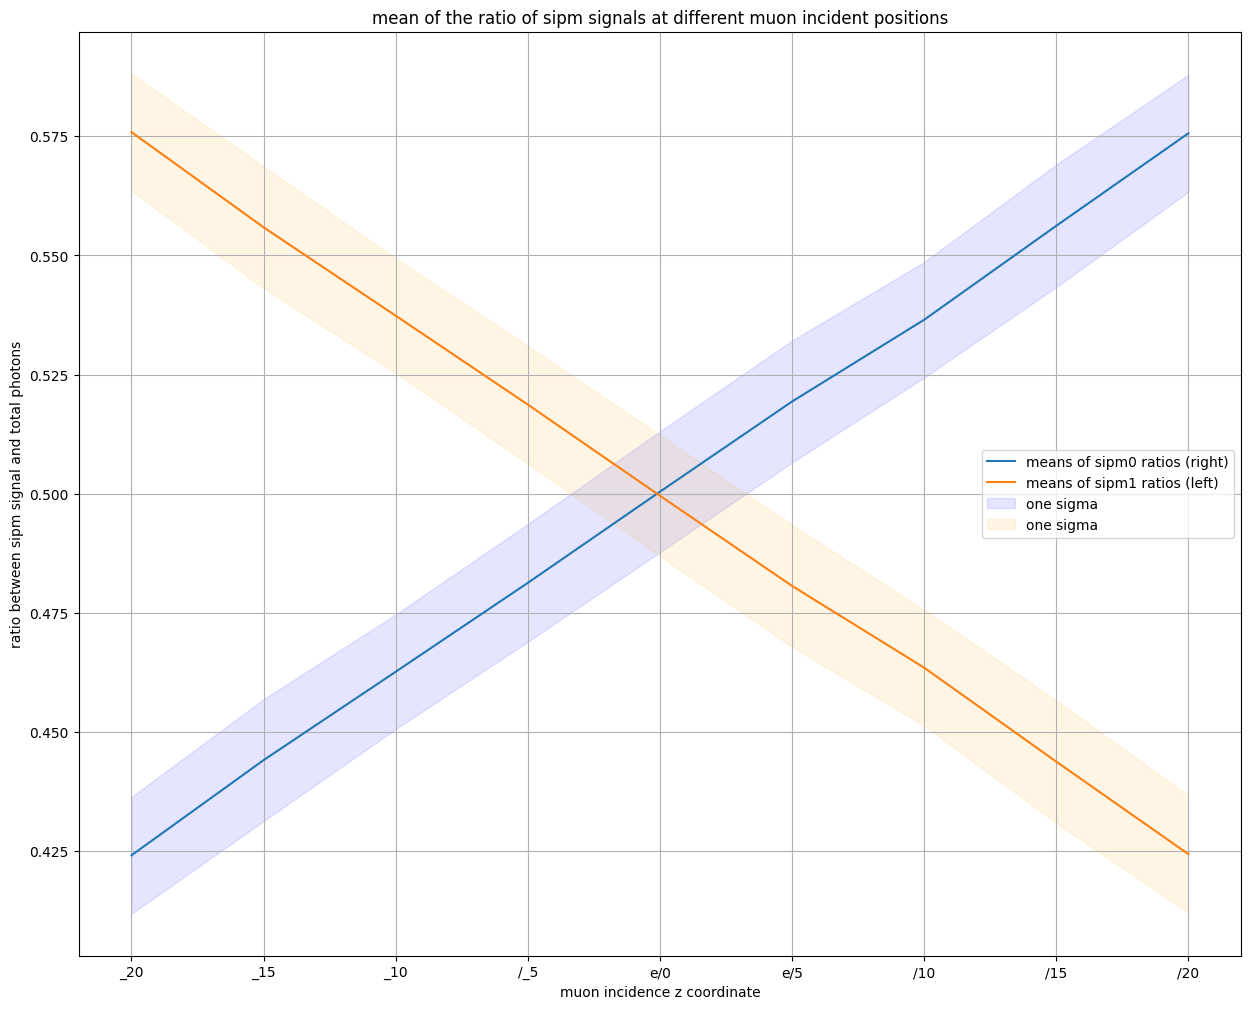

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x_axis = [i[-3:] for i in DIRS]
ax.plot(x_axis, sipm0means, label='means of sipm0 ratios (right)')
ax.plot(x_axis, sipm1means, label='means of sipm1 ratios (left)')
ax.fill_between(x_axis, np.array(sipm0means) - np.array(sipm0std), np.array(sipm0means) + np.array(sipm0std), color='blue', alpha=0.1, label='one sigma')
ax.fill_between(x_axis, np.array(sipm1means) - np.array(sipm1std), np.array(sipm1means) + np.array(sipm1std), color='orange', alpha=0.1, label='one sigma')
ax.grid()
ax.set_xlabel('muon incidence z coordinate')
ax.set_ylabel('ratio between sipm signal and total photons')
ax.set_title("mean of the ratio of sipm signals at different muon incident positions")
ax.legend()


# 10 mm x 62.5 mm x 500 mm bar, Reflective coating

In [54]:
DATADIR = '../ratios/10mmbar-reflective/'
#DIRS = [DATADIR+i for i in ["_25", "_20", "_15", "_10", "_5", "0", "5", "10", "15", "20", "25"]]
DIRS = [DATADIR+i for i in ["_20", "_15", "_10", "_5", "0", "5", "10", "15", "20"]]

In [55]:
beegCounts = [[] for i in DIRS]
for dir in range(len(DIRS)):
    print(DIRS[dir])
    for file in os.listdir(DIRS[dir]):
        file_path = DIRS[dir] + "/"+file
        counts = countsReturner(file_path)
        beegCounts[dir] += counts

../ratios/10mmbar-reflective/_20
../ratios/10mmbar-reflective/_15
../ratios/10mmbar-reflective/_10
../ratios/10mmbar-reflective/_5
../ratios/10mmbar-reflective/0
../ratios/10mmbar-reflective/5
../ratios/10mmbar-reflective/10
../ratios/10mmbar-reflective/15
../ratios/10mmbar-reflective/20


In [56]:
beegRatios = [[] for i in DIRS]
for i in range(len(beegCounts)):
    for event in beegCounts[i]:
        ratio0 = event[1]/(event[1]+event[2])
        ratio1 = event[2]/(event[1]+event[2])
        beegRatios[i].append([ratio0, ratio1])

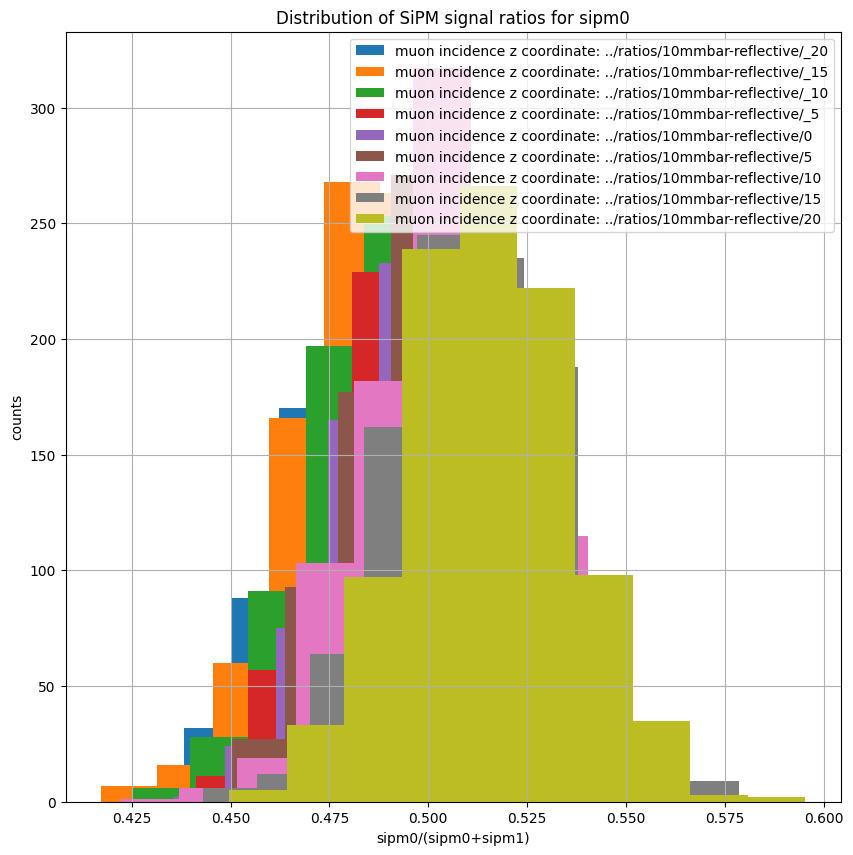

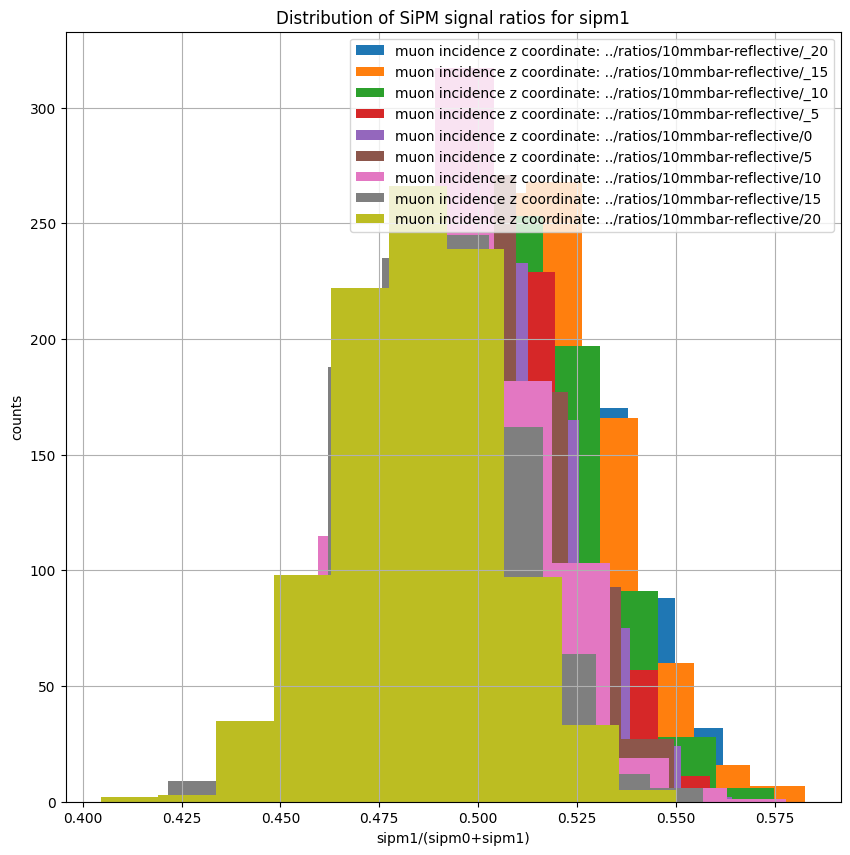

In [57]:
x_axis = DIRS
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[0] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm0/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm0")
ax.legend()
ax.grid()


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[1] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm1/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm1")
ax.legend()
ax.grid()

In [58]:
sipm0means = [np.mean(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1means = [np.mean(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0var  = [np.var(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1var  = [np.var(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0std  = [np.std(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1std  = [np.std(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]

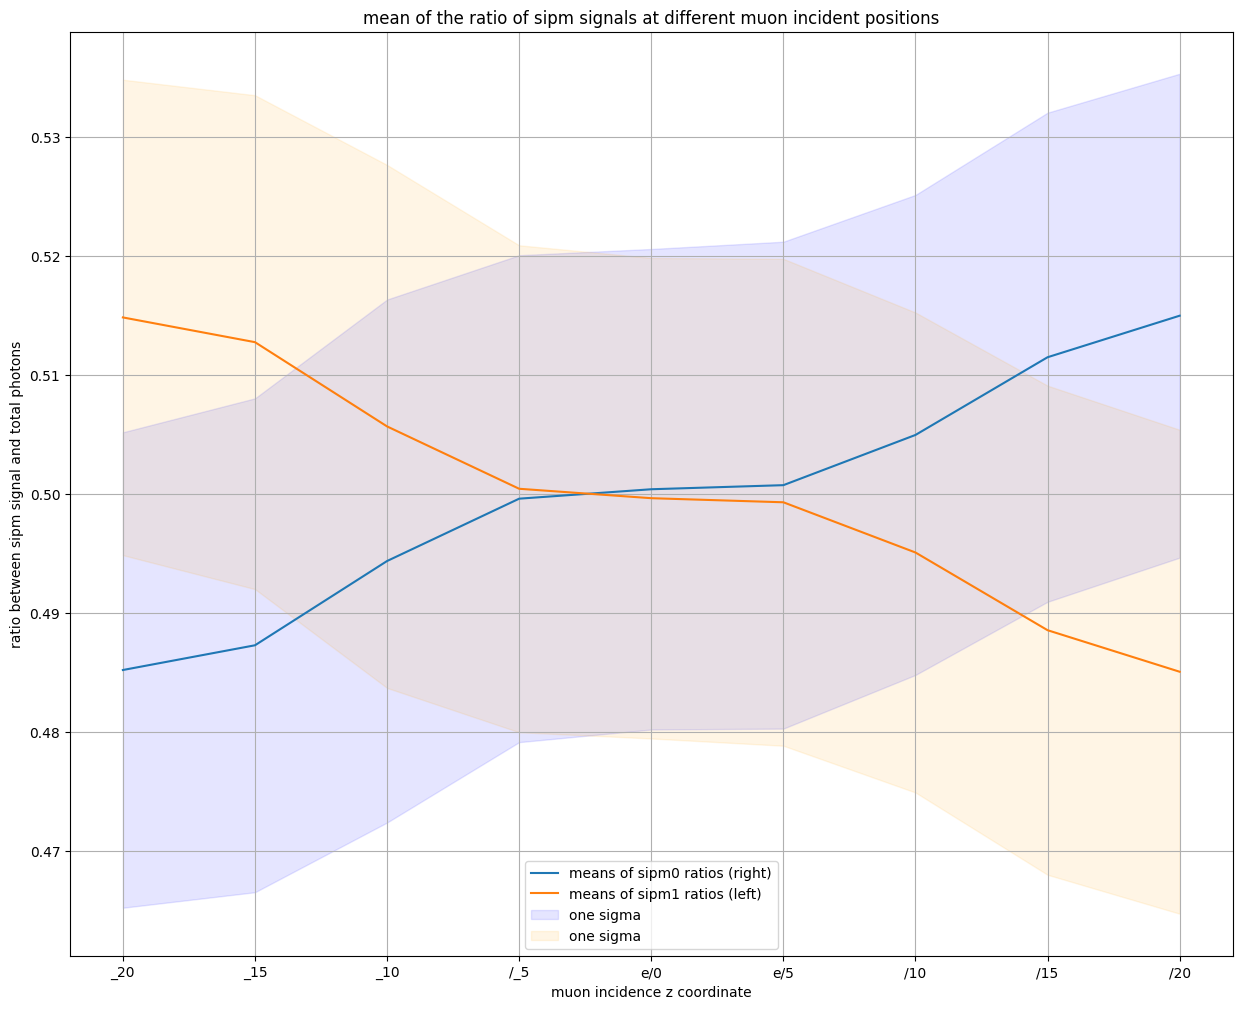

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x_axis = [i[-3:] for i in DIRS]
ax.plot(x_axis, sipm0means, label='means of sipm0 ratios (right)')
ax.plot(x_axis, sipm1means, label='means of sipm1 ratios (left)')
ax.fill_between(x_axis, np.array(sipm0means) - np.array(sipm0std), np.array(sipm0means) + np.array(sipm0std), color='blue', alpha=0.1, label='one sigma')
ax.fill_between(x_axis, np.array(sipm1means) - np.array(sipm1std), np.array(sipm1means) + np.array(sipm1std), color='orange', alpha=0.1, label='one sigma')
ax.grid()
ax.set_xlabel('muon incidence z coordinate')
ax.set_ylabel('ratio between sipm signal and total photons')
ax.set_title("mean of the ratio of sipm signals at different muon incident positions")
ax.legend()


# 10mm x 62.5 mm x 500 mm bar, blocking

In [72]:
DATADIR = '../ratios/10mmbar-block/'
#DIRS = [DATADIR+i for i in ["_25", "_20", "_15", "_10", "_5", "0", "5", "10", "15", "20", "25"]]
DIRS = [DATADIR+i for i in ["_20", "_15", "_10", "_5", "0", "5", "10", "15", "20"]]

In [73]:
beegCounts = [[] for i in DIRS]
for dir in range(len(DIRS)):
    print(DIRS[dir])
    for file in os.listdir(DIRS[dir]):
        file_path = DIRS[dir] + "/"+file
        counts = countsReturner(file_path)
        beegCounts[dir] += counts

../ratios/10mmbar-block/_20
../ratios/10mmbar-block/_15
../ratios/10mmbar-block/_10
../ratios/10mmbar-block/_5
../ratios/10mmbar-block/0
../ratios/10mmbar-block/5
../ratios/10mmbar-block/10
../ratios/10mmbar-block/15
../ratios/10mmbar-block/20


In [74]:
beegRatios = [[] for i in DIRS]
for i in range(len(beegCounts)):
    for event in beegCounts[i]:
        ratio0 = event[1]/(event[1]+event[2])
        ratio1 = event[2]/(event[1]+event[2])
        beegRatios[i].append([ratio0, ratio1])

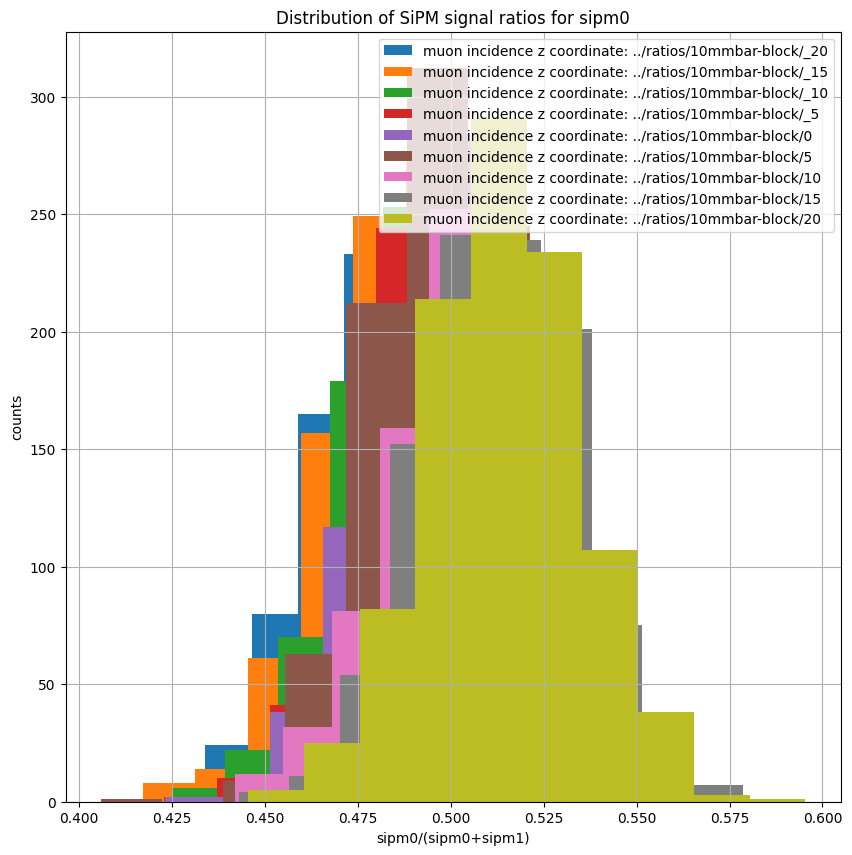

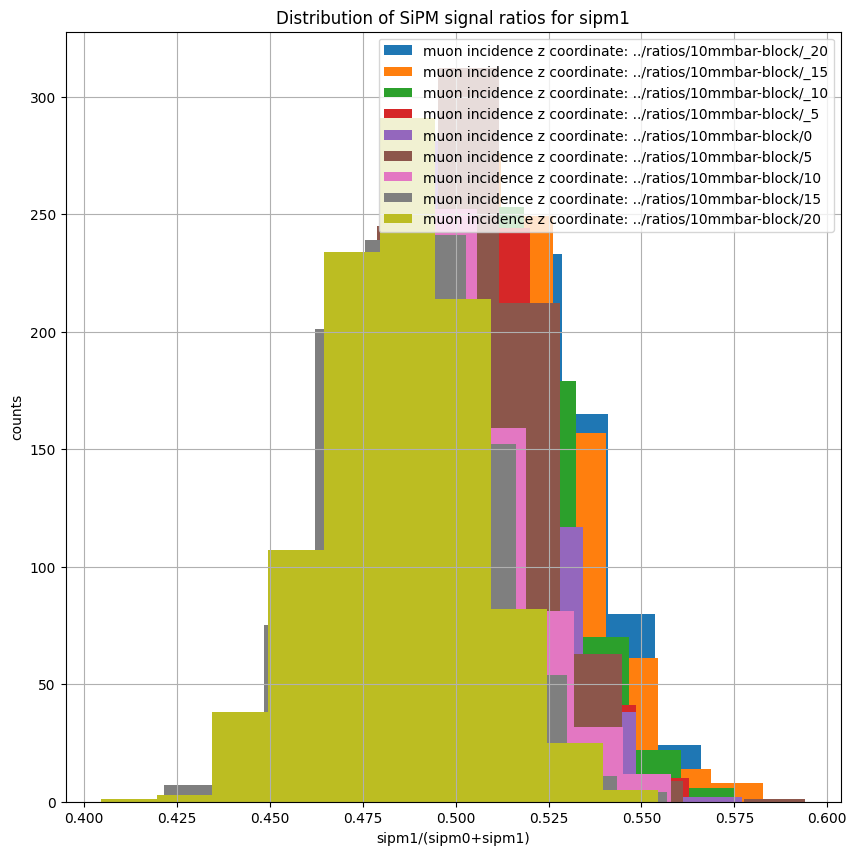

In [75]:
x_axis = DIRS
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[0] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm0/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm0")
ax.legend()
ax.grid()


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
for i in range(len(beegRatios)):
    ax.hist([j[1] for j in beegRatios[i]], label=f"muon incidence z coordinate: {x_axis[i]}")
ax.set_xlabel('sipm1/(sipm0+sipm1)')
ax.set_ylabel("counts")
ax.set_title("Distribution of SiPM signal ratios for sipm1")
ax.legend()
ax.grid()

In [76]:
sipm0means = [np.mean(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1means = [np.mean(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0var  = [np.var(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1var  = [np.var(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm0std  = [np.std(np.array([i[0] for i in beegRatios[j]])) for j in range(len(beegRatios))]
sipm1std  = [np.std(np.array([i[1] for i in beegRatios[j]])) for j in range(len(beegRatios))]

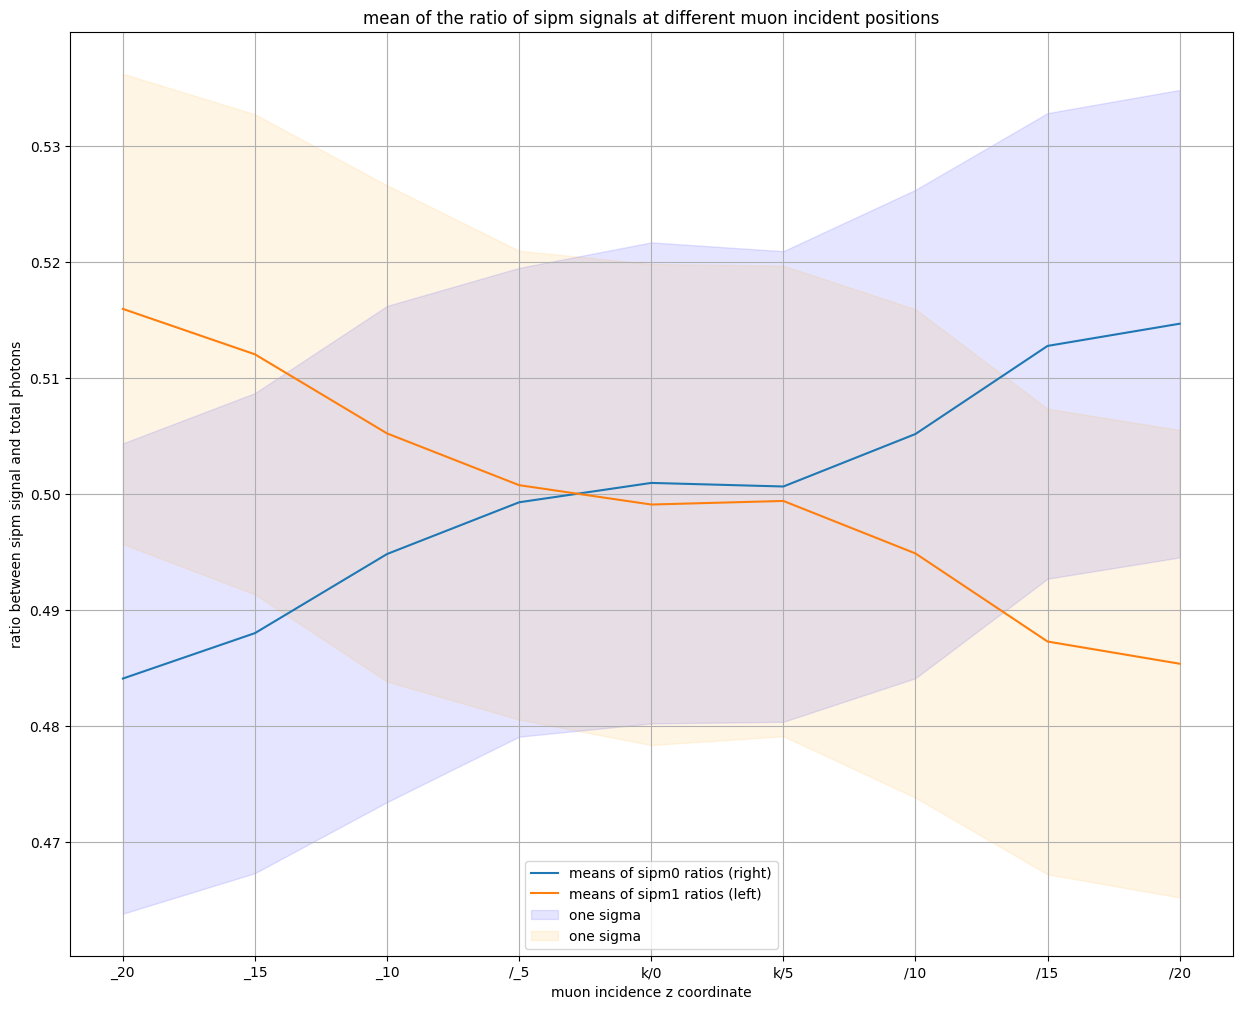

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x_axis = [i[-3:] for i in DIRS]
ax.plot(x_axis, sipm0means, label='means of sipm0 ratios (right)')
ax.plot(x_axis, sipm1means, label='means of sipm1 ratios (left)')
ax.fill_between(x_axis, np.array(sipm0means) - np.array(sipm0std), np.array(sipm0means) + np.array(sipm0std), color='blue', alpha=0.1, label='one sigma')
ax.fill_between(x_axis, np.array(sipm1means) - np.array(sipm1std), np.array(sipm1means) + np.array(sipm1std), color='orange', alpha=0.1, label='one sigma')
ax.grid()
ax.set_xlabel('muon incidence z coordinate')
ax.set_ylabel('ratio between sipm signal and total photons')
ax.set_title("mean of the ratio of sipm signals at different muon incident positions")
ax.legend()
